In [5]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, \
    silhouette_score, davies_bouldin_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 


In [6]:
df_a = pd.read_parquet("../../data/set-a-foundation-model-embeddings.parquet").sort_values('RecordID')
df_c = pd.read_parquet("../../data/set-c-foundation-model-embeddings.parquet").sort_values('RecordID')

df_a["Embedding"] = df_a["Embedding"].apply(lambda x: ast.literal_eval(x.decode("utf-8")))
df_c["Embedding"] = df_c["Embedding"].apply(lambda x: ast.literal_eval(x.decode("utf-8")))


# Initialize the StandardScaler
scaler = StandardScaler()

# Step 2: Convert the embeddings column into a NumPy array
X_train = np.array(df_a["Embedding"].tolist())
X_train = scaler.fit_transform(X_train)

X_test = np.array(df_c["Embedding"].tolist())
X_test = scaler.transform(X_test)

display(X_train)
display(X_test)



y_train = pd.read_csv("../../data/Outcomes-a.txt").sort_values('RecordID')['In-hospital_death']
y_test = pd.read_csv("../../data/Outcomes-c.txt").sort_values('RecordID')['In-hospital_death']


display(y_train)

array([[ 1.15986607, -0.54599612,  0.38355961, ..., -0.4736689 ,
        -0.52604596, -1.38240421],
       [ 0.88547059, -0.13529415,  0.16923968, ...,  0.15108788,
        -1.34111462, -1.32465573],
       [ 1.16965902, -0.60862125, -0.94659434, ..., -0.90754842,
        -0.67931737,  0.06679272],
       ...,
       [-1.24699092, -0.27819813, -0.14915871, ..., -0.2500066 ,
         1.03893531,  0.30835329],
       [-1.30540765,  0.56215588, -0.08429066, ..., -0.68971516,
         0.28017247, -0.61923783],
       [ 0.5384544 , -0.45341851,  0.69242651, ..., -1.05837345,
        -0.44355371, -0.08958962]])

array([[-3.7743819 ,  2.95942036,  4.12436777, ...,  2.4128604 ,
        -0.69538488,  2.01410919],
       [-2.41922025,  2.20862402,  5.0008975 , ..., -0.56362754,
        -1.18214933, -2.16175726],
       [-1.3857065 ,  1.67177687,  6.02644365, ...,  0.4088117 ,
         1.54167171, -0.28065892],
       ...,
       [-3.88649312,  2.46527801,  5.61869432, ...,  1.41751973,
        -0.20529819, -2.23867802],
       [-1.57289453,  0.5135851 ,  4.97513991, ...,  2.04440073,
        -0.24019664,  0.26905292],
       [-0.51363692,  2.23910847,  2.05734397, ...,  0.69897708,
         0.90375217,  2.86947233]])

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    1
3999    0
Name: In-hospital_death, Length: 4000, dtype: int64


Results:
  - AuROC: 0.6498
  - AuPRC: 0.2415


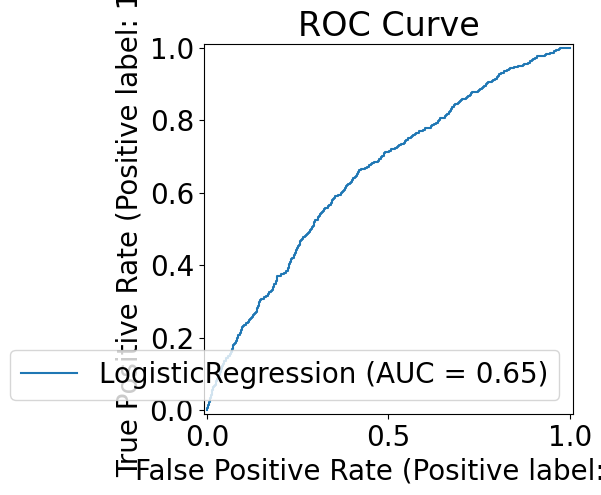

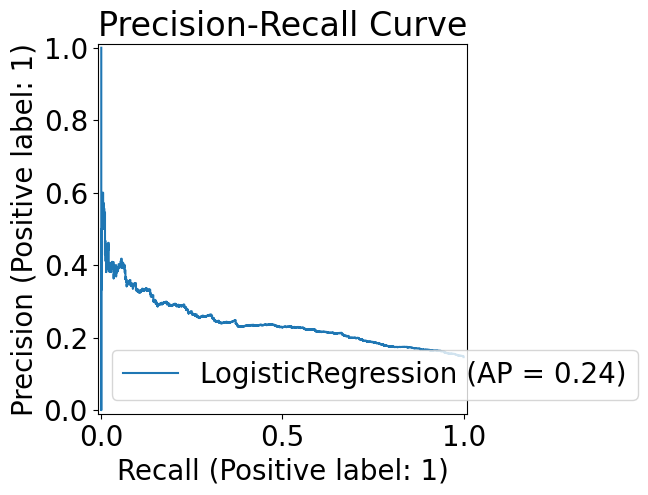

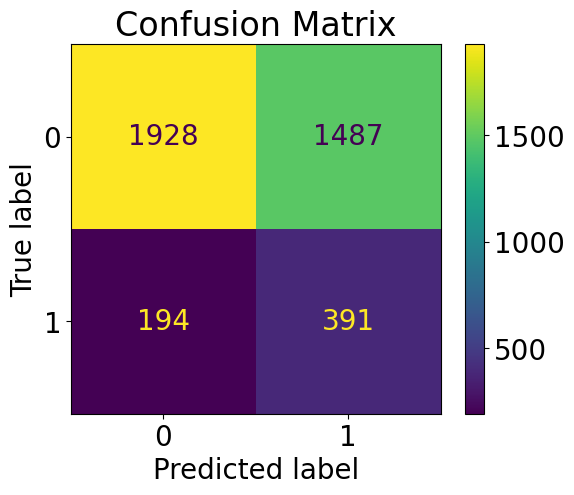

In [7]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate metrics
auroc = roc_auc_score(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

print(f"\nResults:")
print(f"  - AuROC: {auroc:.4f}")
print(f"  - AuPRC: {auprc:.4f}")

# Plot ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title(f'ROC Curve')
plt.show()

# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.title(f'Precision-Recall Curve')
plt.show()

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title(f'Confusion Matrix')
plt.show()

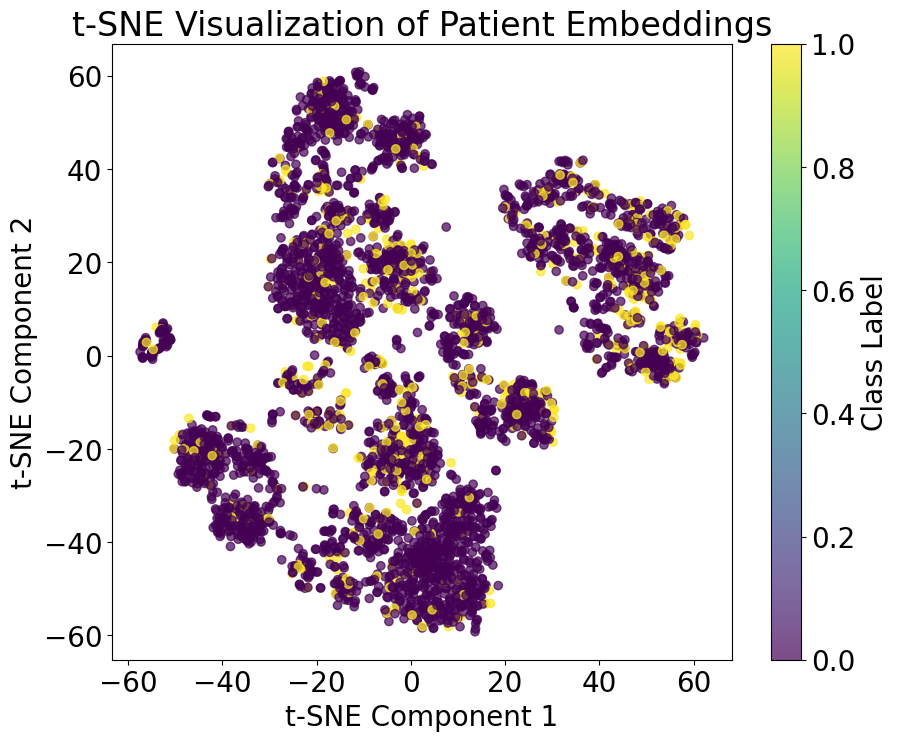

Silhouette Score: -0.0035
Davies-Bouldin Index: 7.5173


In [8]:
plt.rcParams.update({'font.size': 20}) 

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # You can tune perplexity
embeddings_2d = tsne.fit_transform(X_train)  # Shape: (4000, 2)

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label="Class Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Patient Embeddings")
plt.show()


# Compute Silhouette Score
sil_score = silhouette_score(embeddings_2d, y_train)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(embeddings_2d, y_train)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")